In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd ~/PycharmProjects/pqr/
import pqr

/home/akbabkin/PycharmProjects/pqr


In [3]:
prices = pd.read_excel('~/notebooks/pqr/factors/monthlyprice.xlsx', parse_dates=True, index_col=0).astype(float)
pe = pd.read_excel('~/notebooks/pqr/factors/PE.xlsx', parse_dates=True, index_col=0).astype(float)
volume = pd.read_excel('~/notebooks/pqr/factors/betafilter.xlsx', parse_dates=True, index_col=0).astype(float)

In [4]:
prices, pe, volume = pqr.correct_matrices(prices, pe, volume)
prices, pe, volume = pqr.replace_with_nan(prices, pe, volume, to_replace=[0])

In [5]:
value = pqr.factorize(
    factor=pe,
    is_dynamic=False,
    looking_period=3,
    lag_period=0,
    holding_period=3
)

liquidity = pqr.factorize(
    factor=volume,
    is_dynamic=False,
    looking_period=1,
    lag_period=0,
    holding_period=1
)
liquidity_threshold = pqr.Thresholds(lower=10_000_000)

benchmark = pqr.benchmark_from_stock_universe(
    prices,
    filtering_factor=liquidity,
    filtering_thresholds=liquidity_threshold
)

In [6]:
portfolios = pqr.fit_factor_model(
    prices,
    value,
    filtering_factor=liquidity,
    filtering_thresholds=liquidity_threshold
)

In [7]:
pqr.compare_portfolios(*portfolios, benchmark=benchmark)

,"q(0.00, 0.33)","q(0.33, 0.67)","q(0.67, 1.00)"
"Alpha, %",0.45,-0.20,-0.03
Beta,0.92,1.00,0.94
Sharpe Ratio,0.72,0.44,0.50
"Mean Return, %",1.59,1.04,1.14
"Mean Excessive Return, %",0.39,-0.16,-0.07
"Volatility, %",7.63,8.20,7.82
Benchmark Correlation,0.94,0.95,0.93
"Profitable Periods, %",59.51,59.02,56.59
"Maximum Drawdown, %",-96.78,-123.00,-117.36


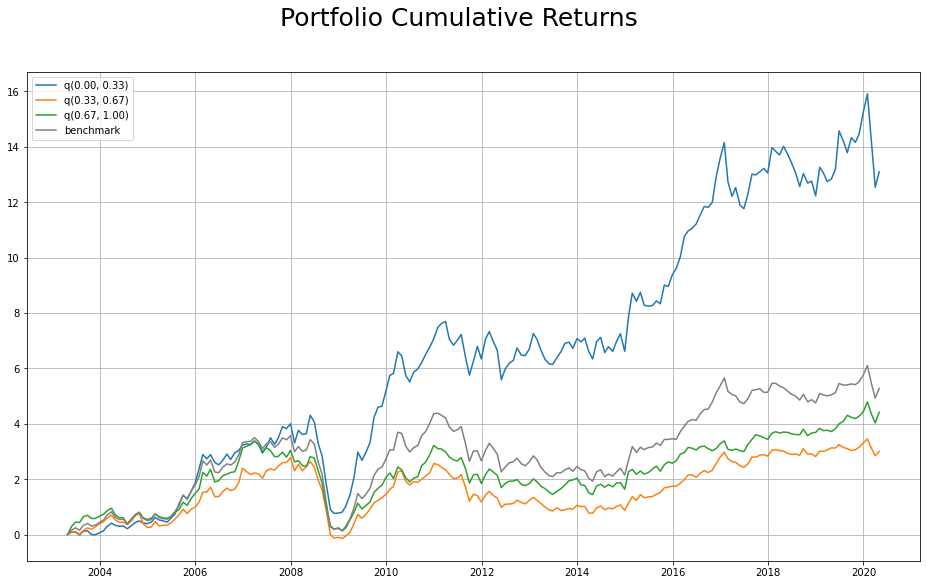

In [8]:
pqr.plot_cumulative_returns(*portfolios, benchmark=benchmark)